We want to define a python class that will represent a handball pitch, containing the 2d coordinates of specific keypoints on the pitch. We can store these keypoints maybe inside a dict, and each point will be a tuple of (x,y) 2d values which we will hardcode(by geometrically calculating the coordinates according to the constraints provided by the rules of the game - handball). each point will have a name(e.g. 7m-left-up, 7m-right-down, etc) that should identify it, and also a number(that lets us represent each point as a class for machine learning models later on).
Now, the points we want to define, at first:
- 7m line's endpoints(up and down), for the left side and for the right side
- 4m goalkeeper line's endpoints(up and down), for the left side and for the right side
- 4 corners of the pitch
- intersection points between 6m line and the goal lines(up and down) for the left side and for the right side
- intersection points between free throw line(9m line) and the side lines of the pitch
- intersection points between the middle line and the center circle
- intersection points between the middle line and the side lines
- the lowest points of the goal posts, on the goal line(for left and right sides)
For the coordinates, let's consider that the origin is at the center of the pitch (0.0,0.0). We should also make constants for:
- length of the pitch:40m
- width of the pitch: 20m
- goal width: 3m
and anything else you see neccessary, getting the values from the rules of the game.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's start with the constants based on handball rules:

```python
PITCH_LEN,PITCH_WID = 40.0,20.0
GOAL_WID = 3.0
AREA_6M,AREA_9M,AREA_7M = 6.0,9.0,7.0
GOAL_AREA = 4.0
CENTER_CIRCLE_R = 1.5
```

Now the class with the keypoint coordinates:

```python
class HandballPitch:
    "Handball pitch with 2d keypoint coordinates"
    def __init__(self):
        hw,hl = PITCH_WID/2, PITCH_LEN/2
        gw = GOAL_WID/2
        self.pts = dict(
            corner_tl=(-hl,hw,0), corner_tr=(hl,hw,1), corner_bl=(-hl,-hw,2), corner_br=(hl,-hw,3),
            line_7m_l_u=(-AREA_7M,gw,4), line_7m_l_d=(-AREA_7M,-gw,5), line_7m_r_u=(AREA_7M,gw,6), line_7m_r_d=(AREA_7M,-gw,7),
            line_4m_l_u=(-hl+GOAL_AREA,gw,8), line_4m_l_d=(-hl+GOAL_AREA,-gw,9), line_4m_r_u=(hl-GOAL_AREA,gw,10), line_4m_r_d=(hl-GOAL_AREA,-gw,11),
            area_6m_l_u=(-hl+AREA_6M,gw,12), area_6m_l_d=(-hl+AREA_6M,-gw,13), area_6m_r_u=(hl-AREA_6M,gw,14), area_6m_r_d=(hl-AREA_6M,-gw,15),
            line_9m_u=(0,hw-AREA_9M,16), line_9m_d=(0,-hw+AREA_9M,17),
            center_circle_u=(0,CENTER_CIRCLE_R,18), center_circle_d=(0,-CENTER_CIRCLE_R,19),
            midline_u=(0,hw,20), midline_d=(0,-hw,21),
            goal_l_u=(-hl,gw,22), goal_l_d=(-hl,-gw,23), goal_r_u=(hl,gw,24), goal_r_d=(hl,-gw,25))
```

In [ ]:
class HandballPitch:
    PITCH_LENGTH = 40.0
    PITCH_WIDTH = 20.0
    GOAL_WIDTH = 3.0
    GOAL_AREA_DISTANCE = 6.0
    FREE_THROW_DISTANCE = 9.0
    PENALTY_DISTANCE = 7.0
    GOALKEEPER_DISTANCE = 4.0
    PENALTY_LINE_LENGTH = 1.0
    GOALKEEPER_LINE_LENGTH = 0.15
    FREE_THROW_SIDELINE_INTERSECTION_LENGTH = 2.958

    def __init__(self):
        hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2
        
        self.keypoints = dict(
            corner_left_up=(-hl, hw), corner_left_down=(-hl, -hw),
            corner_right_up=(hl, hw), corner_right_down=(hl, -hw),
            seven_left_up=(-hl + self.PENALTY_DISTANCE, self.PENALTY_LINE_LENGTH/2.0), seven_left_down=(-hl + self.PENALTY_DISTANCE, -self.PENALTY_LINE_LENGTH/2.0),
            seven_right_up=(hl - self.PENALTY_DISTANCE, self.PENALTY_LINE_LENGTH/2.0), seven_right_down=(hl - self.PENALTY_DISTANCE, -self.PENALTY_LINE_LENGTH/2.0),
            four_left_up=(-hl + self.GOALKEEPER_DISTANCE, self.GOALKEEPER_LINE_LENGTH/2.0), four_left_down=(-hl + self.GOALKEEPER_DISTANCE, -self.GOALKEEPER_LINE_LENGTH/2.0),
            four_right_up=(hl - self.GOALKEEPER_DISTANCE, self.GOALKEEPER_LINE_LENGTH/2.0), four_right_down=(hl - self.GOALKEEPER_DISTANCE, -self.GOALKEEPER_LINE_LENGTH/2.0),
            six_goalline_left_up=(-hl, self.GOAL_AREA_DISTANCE + gw), six_goalline_left_down=(-hl, -self.GOAL_AREA_DISTANCE - gw),
            six_goalline_right_up=(hl, self.GOAL_AREA_DISTANCE + gw), six_goalline_right_down=(hl, -self.GOAL_AREA_DISTANCE - gw),
            nine_sideline_left_up=(-hl + self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, hw), nine_sideline_left_down=(-hl + self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, -hw),
            nine_sideline_right_up=(hl - self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, hw), nine_sideline_right_down=(hl - self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, -hw),
            middle_sideline_up=(0.0, hw), middle_sideline_down=(0.0, -hw),
            goal_post_left_up=(-hl, gw), goal_post_left_down=(-hl, -gw),
            goal_post_right_up=(hl, gw), goal_post_right_down=(hl, -gw)
        )
        
        self.keypoint_ids = {k: i for i,k in enumerate(self.keypoints.keys(), 1)}

In [ ]:
h = HandballPitch()
print(h.keypoints)

{'corner_left_up': (-20.0, 10.0), 'corner_left_down': (-20.0, -10.0), 'corner_right_up': (20.0, 10.0), 'corner_right_down': (20.0, -10.0), 'seven_left_up': (-13.0, 0.5), 'seven_left_down': (-13.0, -0.5), 'seven_right_up': (13.0, 0.5), 'seven_right_down': (13.0, -0.5), 'four_left_up': (-16.0, 0.075), 'four_left_down': (-16.0, -0.075), 'four_right_up': (16.0, 0.075), 'four_right_down': (16.0, -0.075), 'six_goalline_left_up': (-20.0, 7.5), 'six_goalline_left_down': (-20.0, -7.5), 'six_goalline_right_up': (20.0, 7.5), 'six_goalline_right_down': (20.0, -7.5), 'nine_sideline_left_up': (-17.042, 10.0), 'nine_sideline_left_down': (-17.042, -10.0), 'nine_sideline_right_up': (17.042, 10.0), 'nine_sideline_right_down': (17.042, -10.0), 'middle_sideline_up': (0.0, 10.0), 'middle_sideline_down': (0.0, -10.0), 'goal_post_left_up': (-20.0, 1.5), 'goal_post_left_down': (-20.0, -1.5), 'goal_post_right_up': (20.0, 1.5), 'goal_post_right_down': (20.0, -1.5)}


Now please implement a draw_pitch function for this class, that will draw the keypoints of the class and uniting them with lines accordingly. For the 9m and goal area lines we will draw them according to the rules of the game:In front of each goal there is a goal area (see diagram 5). The goal area is defined by the goal-area
line (6-metre line), which is drawn as follows:
a. 3 metres long line directly in front of the goal; this line is parallel to the goal line and 6 metres
away from it (measured from the rear edge of the goal line to the front edge of the goal-area
line);
b. two quarter circles, each with a radius of 6 metres (measured from the rear inner corner of the
goalposts), connecting the 3 metres long line with the outer goal line (see diagrams 1a, 1b and
2a).
5. The free throw line (9-metre line) is a broken line, drawn 3 metres outside the goal-area line. Both
the segments of the line and the spaces between them measure 15 cm (see diagrams 1a and 1b).
6. The 7-metre line is a 1 metre long line, directly in front of the goal. It is parallel to the goal line and
7 metres away from it (measured from the rear edge of the goal line to the front edge of the 7-metre
line); (see diagrams 1a and 1b).
7. The goalkeeper’s restraining line (the 4-metre line) is a 15 cm long line, directly in front of the goal.
It is parallel to the goal line and 4 metres away from it (measured from the rear edge of the goal line
to the front edge of the 4-metre line) (see diagrams 1a and 1b).

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

@patch
def draw_pitch(self:HandballPitch, ax=None, figsize=(12,8)):
    "Draw handball pitch with all lines and keypoints"
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2
    
    ax.plot([-hl,-hl,hl,hl,-hl], [-hw,hw,hw,-hw,-hw], 'k-', linewidth=2)
    ax.plot([0,0], [-hw,hw], 'k-', linewidth=2)
    
    ax.plot([-hl+self.PENALTY_DISTANCE,-hl+self.PENALTY_DISTANCE], [-0.5,0.5], 'k-', linewidth=2)
    ax.plot([hl-self.PENALTY_DISTANCE,hl-self.PENALTY_DISTANCE], [-0.5,0.5], 'k-', linewidth=2)
    
    ax.plot([-hl+self.GOALKEEPER_DISTANCE,-hl+self.GOALKEEPER_DISTANCE], [-7.5,7.5], 'k-', linewidth=1)
    ax.plot([hl-self.GOALKEEPER_DISTANCE,hl-self.GOALKEEPER_DISTANCE], [-7.5,7.5], 'k-', linewidth=1)
    
    ax.plot([-hl,-hl+1.5], [gw,gw], 'k-', linewidth=2)
    ax.plot([-hl,-hl+1.5], [-gw,-gw], 'k-', linewidth=2)
    ax.plot([hl,hl-1.5], [gw,gw], 'k-', linewidth=2)
    ax.plot([hl,hl-1.5], [-gw,-gw], 'k-', linewidth=2)
    
    arc_left_up = Arc((-hl, gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=0, theta2=90, color='k', linewidth=2)
    arc_left_down = Arc((-hl, -gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=270, theta2=360, color='k', linewidth=2)
    arc_right_up = Arc((hl, gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=90, theta2=180, color='k', linewidth=2)
    arc_right_down = Arc((hl, -gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=180, theta2=270, color='k', linewidth=2)
    ax.add_patch(arc_left_up); ax.add_patch(arc_left_down); ax.add_patch(arc_right_up); ax.add_patch(arc_right_down)
    
    nine_dist = self.GOAL_AREA_DISTANCE + 3
    arc_nine_left_up = Arc((-hl, gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=0, theta2=90, color='k', linewidth=2, linestyle='--')
    arc_nine_left_down = Arc((-hl, -gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=270, theta2=360, color='k', linewidth=2, linestyle='--')
    arc_nine_right_up = Arc((hl, gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=90, theta2=180, color='k', linewidth=2, linestyle='--')
    arc_nine_right_down = Arc((hl, -gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=180, theta2=270, color='k', linewidth=2, linestyle='--')
    ax.add_patch(arc_nine_left_up); ax.add_patch(arc_nine_left_down); ax.add_patch(arc_nine_right_up); ax.add_patch(arc_nine_right_down)
    
    for name,(x,y) in self.keypoints.items(): ax.plot(x, y, 'ro', markersize=4)
    
    ax.set_aspect('equal'); ax.set_xlim(-hl-2, hl+2); ax.set_ylim(-hw-2, hw+2); ax.grid(True, alpha=0.3)
    return ax
```

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from fastcore.utils import patch

@patch
def draw_pitch(self:HandballPitch, ax=None, figsize=(12,8)):
    "Draw handball pitch with all lines and keypoints"
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2

    ax.plot([-hl,-hl,hl,hl,-hl], [-hw,hw,hw,-hw,-hw], 'k-', linewidth=2)
    ax.plot([0,0], [-hw,hw], 'k-', linewidth=2)
    
    ax.plot([-hl+self.PENALTY_DISTANCE,-hl+self.PENALTY_DISTANCE], [-0.5,0.5], 'k-', linewidth=2)
    ax.plot([hl-self.PENALTY_DISTANCE,hl-self.PENALTY_DISTANCE], [-0.5,0.5], 'k-', linewidth=2)
    
    ax.plot([-hl+self.GOALKEEPER_DISTANCE,-hl+self.GOALKEEPER_DISTANCE], [-0.075,0.075], 'k-', linewidth=2)
    ax.plot([hl-self.GOALKEEPER_DISTANCE,hl-self.GOALKEEPER_DISTANCE], [-0.075,0.075], 'k-', linewidth=2)
    
    ax.plot([-hl+self.GOAL_AREA_DISTANCE,-hl+self.GOAL_AREA_DISTANCE], [gw,-gw], 'k-', linewidth=2)
    ax.plot([hl-self.GOAL_AREA_DISTANCE,hl-self.GOAL_AREA_DISTANCE], [gw,-gw], 'k-', linewidth=2)

    ax.plot([-hl+self.FREE_THROW_DISTANCE,-hl+self.FREE_THROW_DISTANCE], [gw,-gw], 'k--', linewidth=2)
    ax.plot([hl-self.FREE_THROW_DISTANCE,hl-self.FREE_THROW_DISTANCE], [gw,-gw], 'k--', linewidth=2)
    
    arc_left_up = Arc((-hl, gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=0, theta2=90, color='k', linewidth=2)
    arc_left_down = Arc((-hl, -gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=270, theta2=360, color='k', linewidth=2)
    arc_right_up = Arc((hl, gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=90, theta2=180, color='k', linewidth=2)
    arc_right_down = Arc((hl, -gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=180, theta2=270, color='k', linewidth=2)
    ax.add_patch(arc_left_up); ax.add_patch(arc_left_down); ax.add_patch(arc_right_up); ax.add_patch(arc_right_down)
    
    nine_dist = self.GOAL_AREA_DISTANCE + 3
    arc_nine_left_up = Arc((-hl, gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=0, theta2=90, color='k', linewidth=2, linestyle='--')
    arc_nine_left_down = Arc((-hl, -gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=270, theta2=360, color='k', linewidth=2, linestyle='--')
    arc_nine_right_up = Arc((hl, gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=90, theta2=180, color='k', linewidth=2, linestyle='--')
    arc_nine_right_down = Arc((hl, -gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=180, theta2=270, color='k', linewidth=2, linestyle='--')
    ax.add_patch(arc_nine_left_up); ax.add_patch(arc_nine_left_down); ax.add_patch(arc_nine_right_up); ax.add_patch(arc_nine_right_down)
    
    for name,(x,y) in self.keypoints.items(): ax.plot(x, y, 'ro', markersize=4)
    
    ax.set_aspect('equal'); ax.set_xlim(-hl, hl); ax.set_ylim(-hw, hw); ax.grid(True, alpha=0.3); ax.set_axis_off();
    return ax

<Axes: >

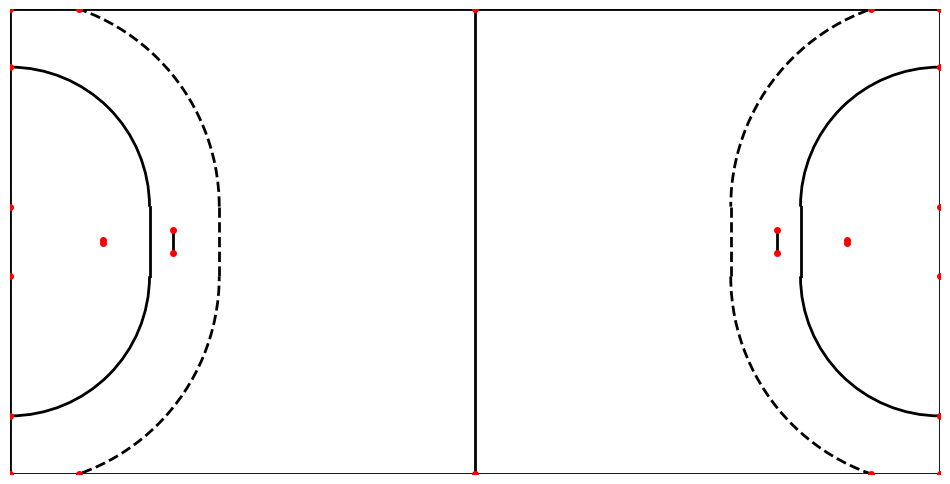

In [ ]:
h.draw_pitch()

All good. Now I want you you to show the image sampled_frames/frame_003.jpg.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
from PIL import Image
Image.open('sampled_frames/frame_003.jpg')
```

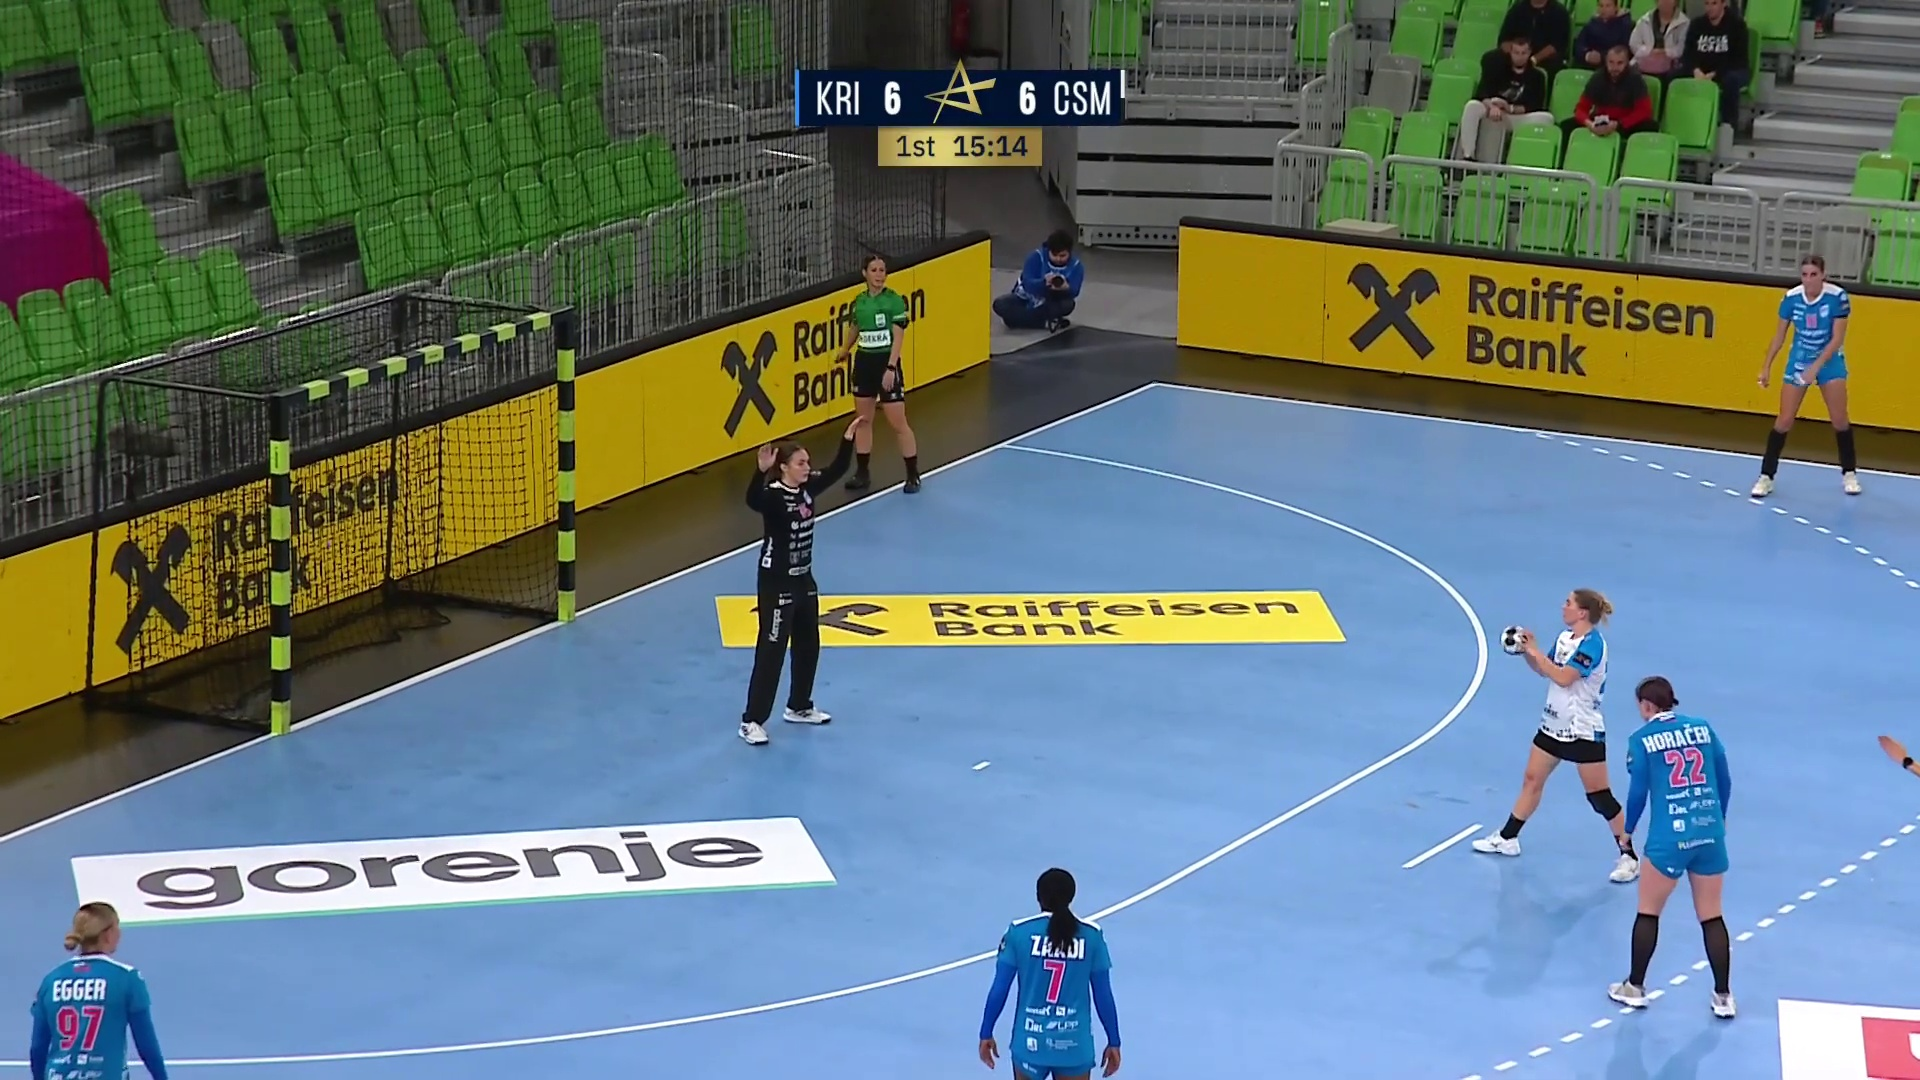

In [ ]:
from PIL import Image

img = Image.open('sampled_frames/frame_003.jpg')
img

Now implement a new method for the initial class, that finds the homography matrix between an image and the 2d plane, given a set of points and their coordinates. The 2d coordinates will be fetched from the class' constants. Also make a mock call for that function.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I notice that the dialog has been truncated - originally there were 9 messages but now only 1 remains. This means I don't have the context of the initial class you're referring to or what embeddings project we were working on.

Could you clarify what class you'd like me to add this homography method to? It sounds like we're switching from embeddings to computer vision work with homography matrices. Should I:

1. Create a new class for handling homography/image transformations, or
2. Are you referring to a different class that should be in the context?

Also, what 2d coordinates should be stored as class constants for this use case?